# Stock Analysis


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
#package to import heaps of files
import glob

In [ ]:
glob.glob(r'individual_stocks_5yr/*csv')

In [4]:
#how many files I just uploaded
len(glob.glob(r'individual_stocks_5yr/*csv'))

505

In [5]:
#collect files you want from the list
company_list = [
     r'individual_stocks_5yr\\AAPL_data.csv',
     r'individual_stocks_5yr\\AMZN_data.csv',
     r'individual_stocks_5yr\\GOOG_data.csv',
     r'individual_stocks_5yr\\MSFT_data.csv'
]

In [6]:
#create DF from all files
# Create a list to hold the dataframes
dfs = []

# Loop through each file and read the data into a dataframe
for file in company_list:
    current_df = pd.read_csv(file)
    dfs.append(current_df)

# Concatenate all dataframes into one
all_data = pd.concat(dfs, ignore_index=True)

# Display the concatenated dataframe
print(all_data)

            date     open     high      low    close     volume  Name
0     2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1     2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2     2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3     2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4     2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...          ...      ...      ...      ...      ...        ...   ...
4747  2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
4748  2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
4749  2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
4750  2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
4751  2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[4752 rows x 7 columns]


In [7]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [8]:
all_data.date = pd.to_datetime(all_data.date)

In [9]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [10]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


<Axes: xlabel='date', ylabel='close'>

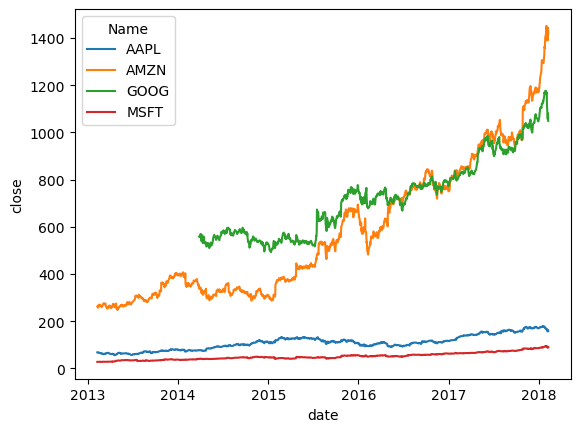

In [14]:
sns.lineplot(x='date',y='close', hue='Name', data=all_data)

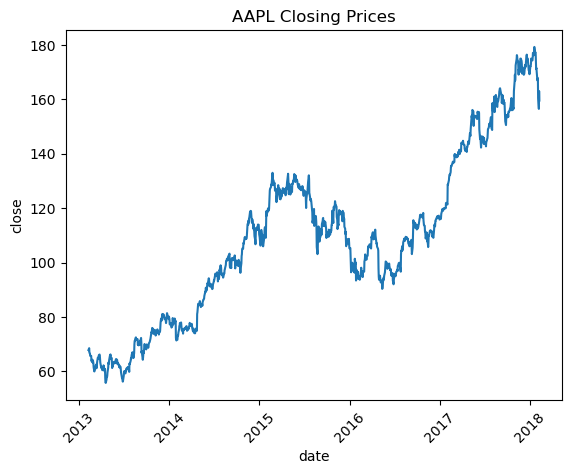

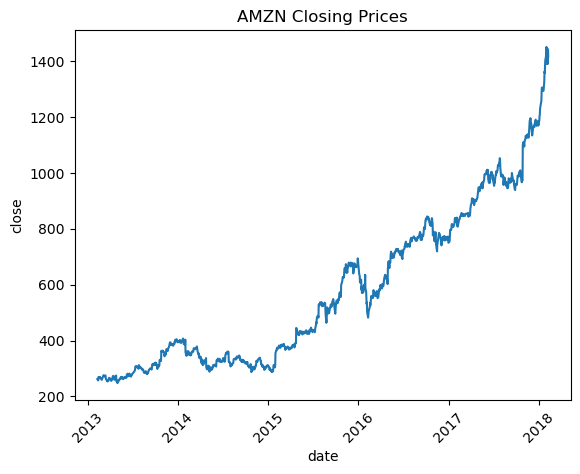

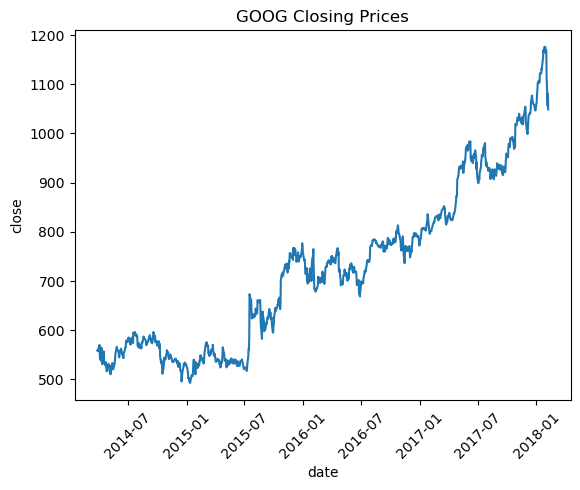

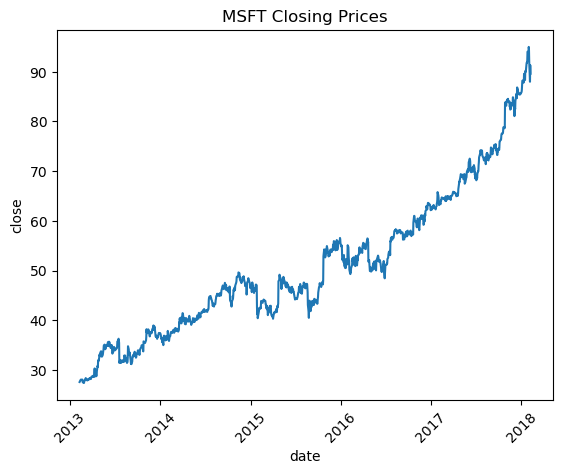

In [15]:
# Iterate over each unique stock and plot the data
unique_stocks = all_data['Name'].unique()
for stock in unique_stocks:
    df_stock = all_data[all_data['Name'] == stock]
    sns.lineplot(x='date', y='close', data=df_stock)
    plt.title(f'{stock} Closing Prices')
    plt.xticks(rotation=45)
    plt.show()

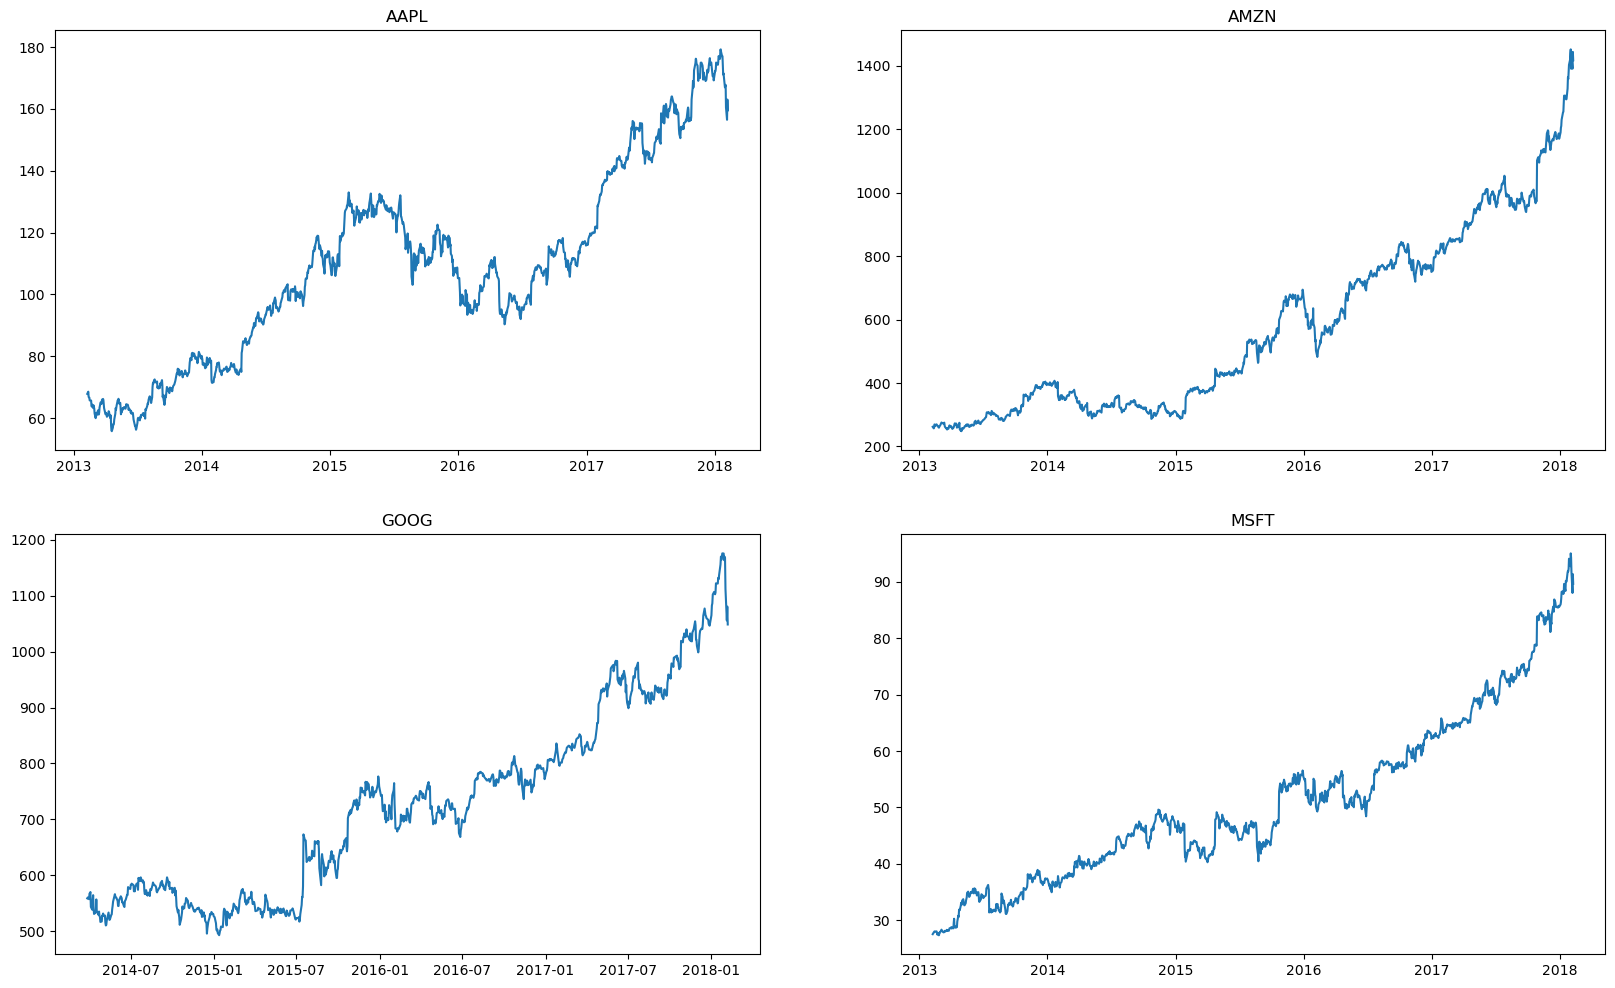

In [21]:
#plot as subplots
plt.figure(figsize=(20,12))
for index, company in enumerate(unique_stocks, 1):
    plt.subplot(2,2,index)
    filter1=all_data['Name']==company
    df=all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

What was the moving average of various stocks?

In [22]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


For MA we select a window (such as 10) and find MA of each 10, ie 1-10, 2-11,3-12 ...

In [25]:
#find MA for first 10
all_data.close.rolling(window=10).mean().head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9    66.03251
Name: close, dtype: float64

In [26]:
new_data= all_data.copy()

In [28]:
ma_day=[10,20,50]
for ma in ma_day:
    new_data['close_'+str(ma)]= new_data['close'].rolling(ma).mean()

In [31]:
new_data.tail()

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [33]:
new_data.set_index('date', inplace=True)

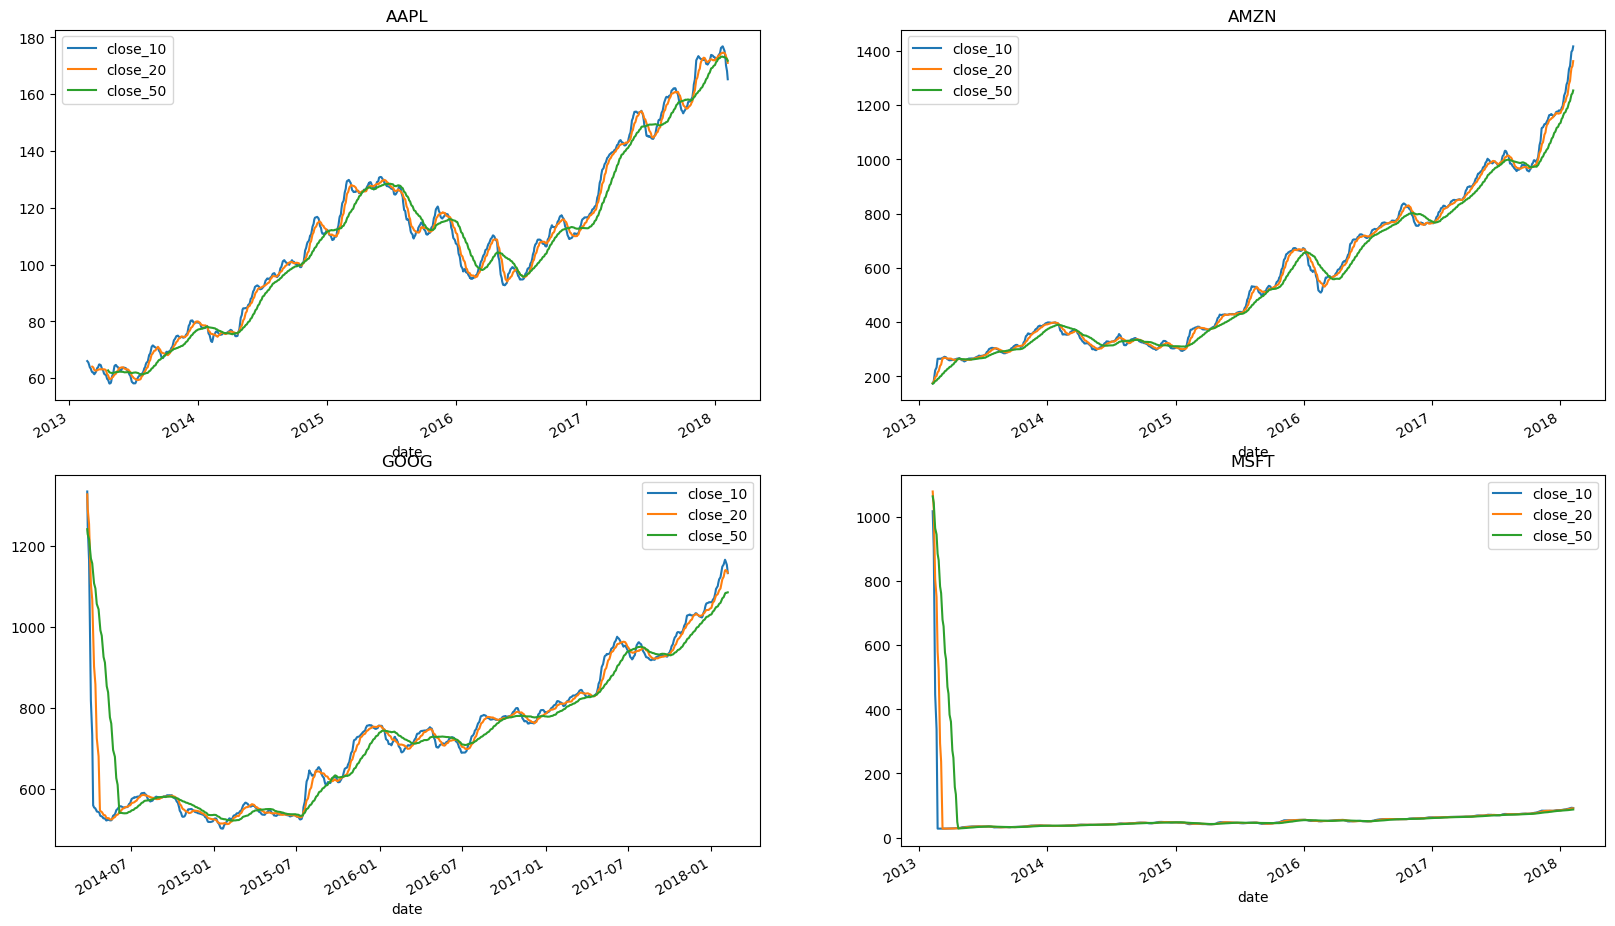

In [37]:
#plot MAs as subplots
plt.figure(figsize=(20,12))
for index, company in enumerate(unique_stocks, 1):
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

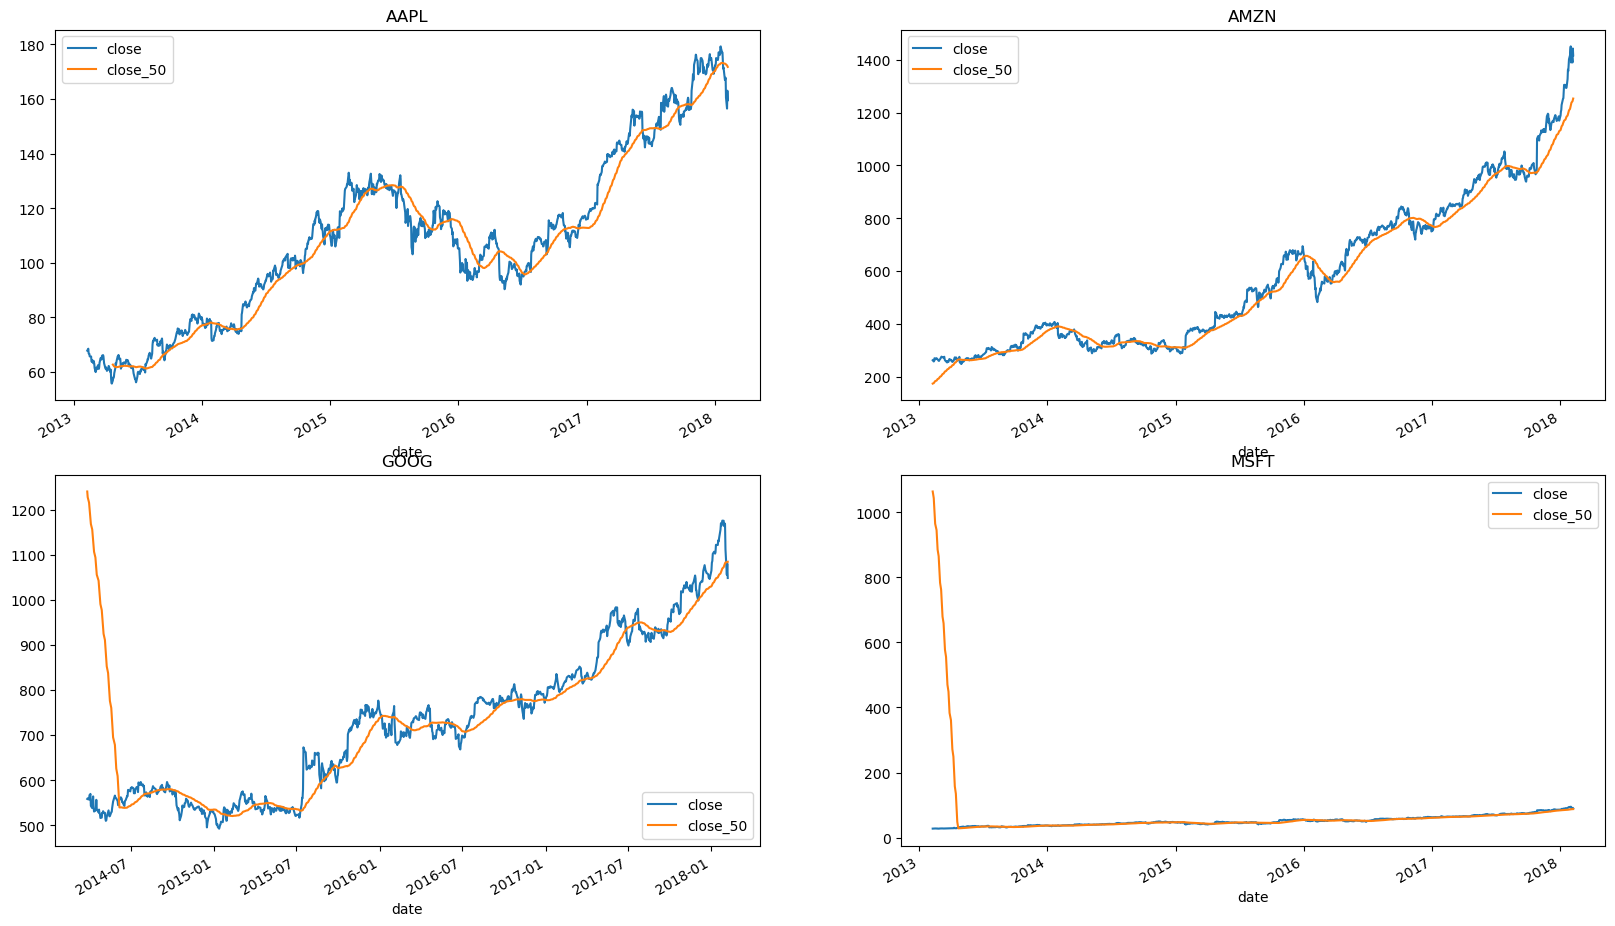

In [36]:
#plot MA_50 vs cloe prices as subplots
plt.figure(figsize=(20,12))
for index, company in enumerate(unique_stocks, 1):
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    df[['close','close_50']].plot(ax=plt.gca())
    plt.title(company)

In [117]:
ma_day=[100,200]
for ma in ma_day:
    new_data['close_'+str(ma)]= new_data['close'].rolling(ma).mean()

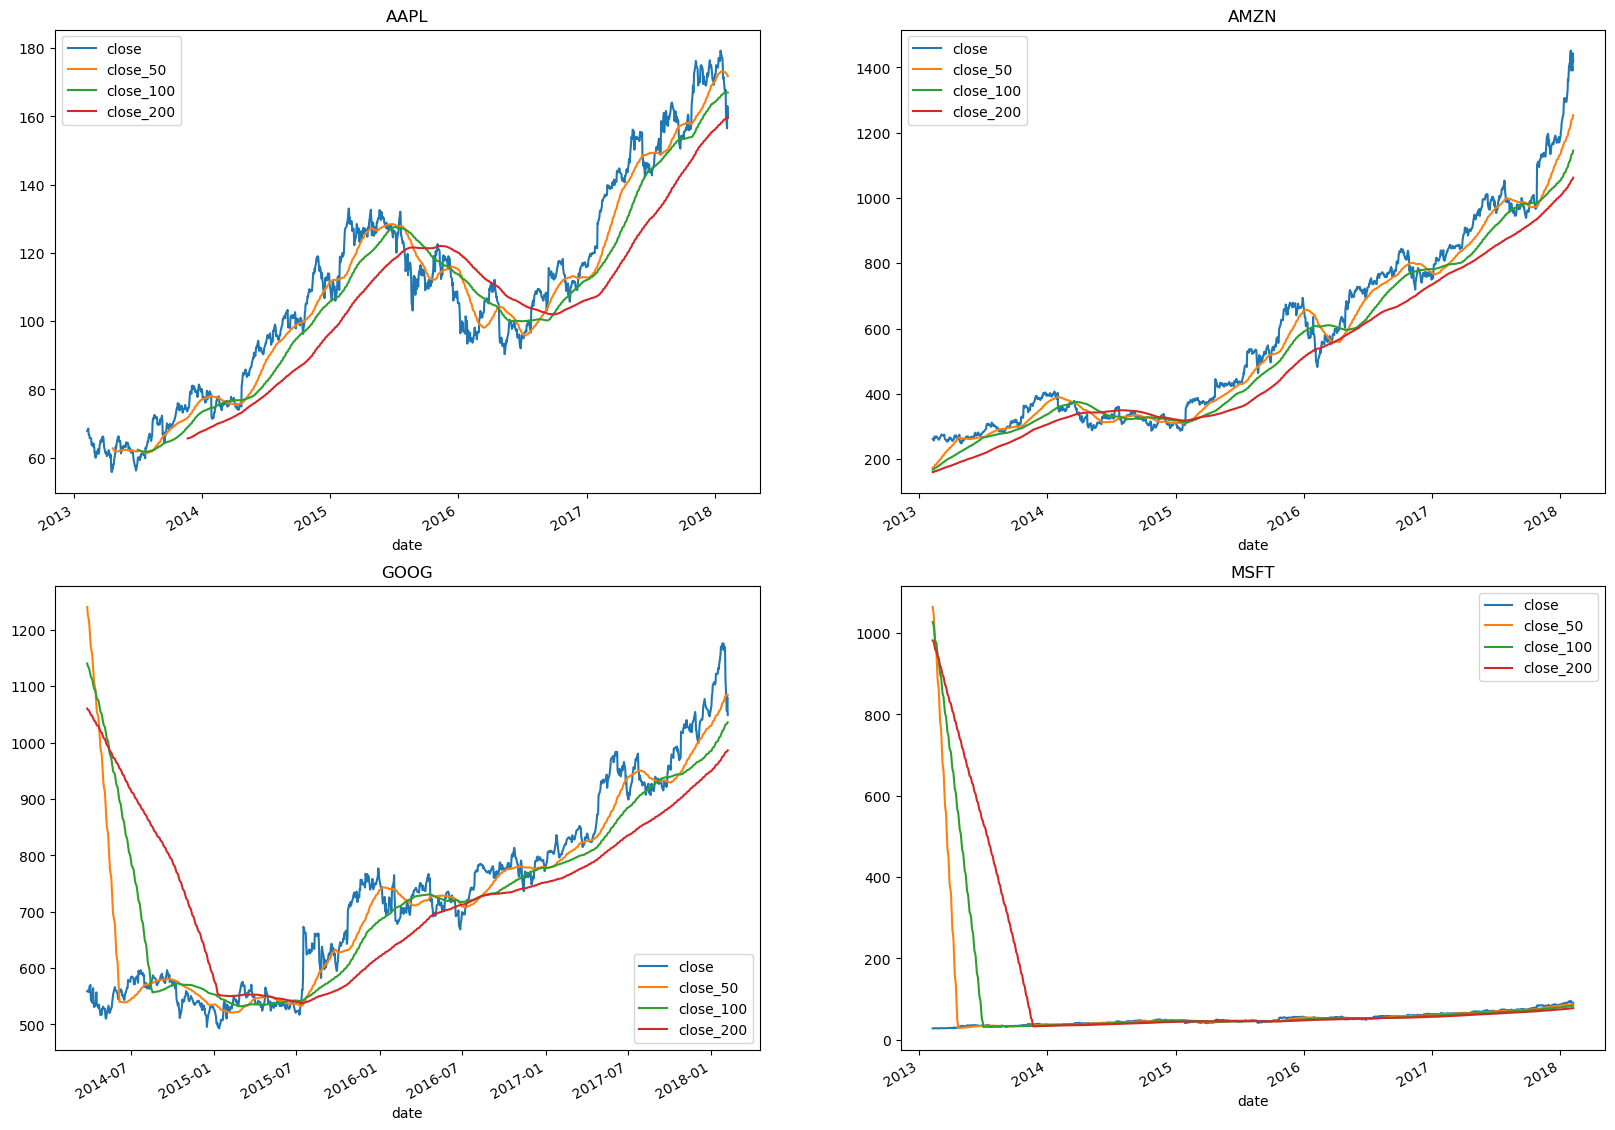

In [119]:
#plot MA_50/100/200 vs cloe prices as subplots
plt.figure(figsize=(20,15))
for index, company in enumerate(unique_stocks, 1):
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    df[['close','close_50','close_100','close_200']].plot(ax=plt.gca())
    plt.title(company)

In [44]:
apple = all_data[all_data.Name =='AAPL']

In [45]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [47]:
#find daily close % changes

apple['Daily Return %']=apple.close.pct_change()*100

<Axes: xlabel='date', ylabel='Daily Return %'>

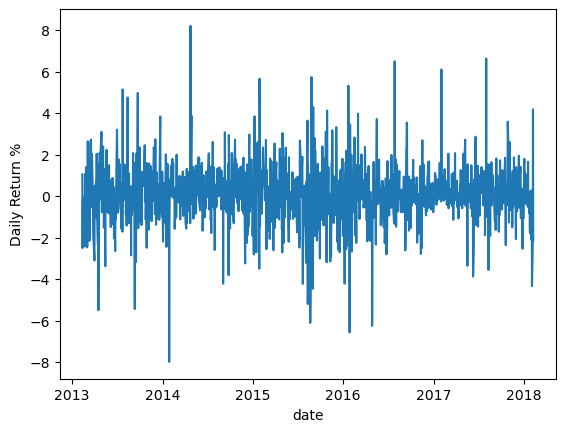

In [50]:
sns.lineplot(x='date',y='Daily Return %', data=apple)

In [52]:
import plotly.express as px

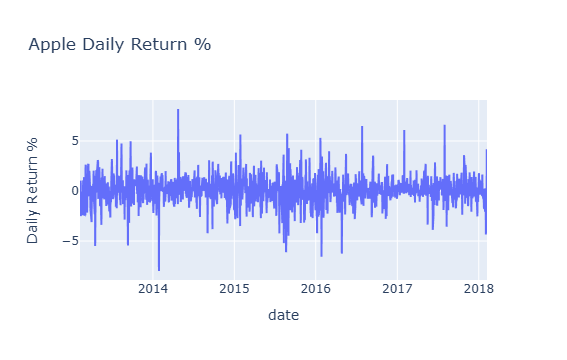

In [57]:
fig = px.line(apple, x='date',y='Daily Return %', title='Apple Daily Return %')
fig.show()

In [58]:
apple.head()

,date,open,high,low,close,volume,Name,Daily Return %
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [59]:
apple.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
Name                      object
Daily Return %           float64
dtype: object

In [65]:
apple['year']=apple.date.dt.year
apple['quarter']=apple.date.dt.quarter
apple['week']=apple.date.dt.isocalendar().week

In [66]:
apple.head()

,date,open,high,low,close,volume,Name,Daily Return %,year,quarter,week
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,2013,1,6
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235,2013,1,7
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658,2013,1,7
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297,2013,1,7
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934,2013,1,7


In [69]:
appl_year = apple.groupby(['year'])['close'].mean().reset_index()

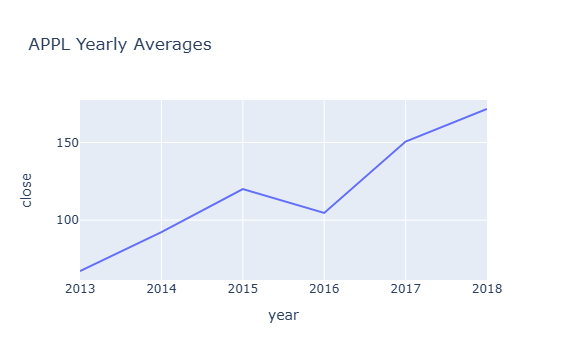

In [70]:
px.line(appl_year, 'year','close',title='APPL Yearly Averages')

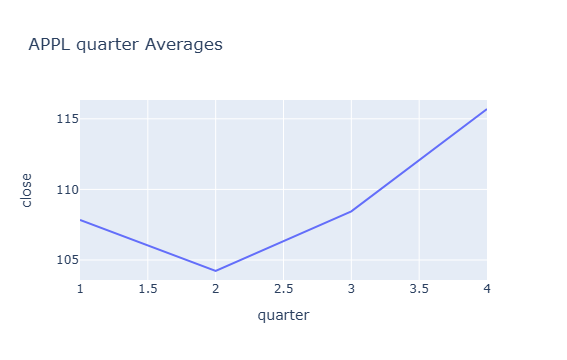

In [71]:
appl_quarter = apple.groupby(['quarter'])['close'].mean().reset_index()
px.line(appl_quarter, 'quarter','close',title='APPL quarter Averages')

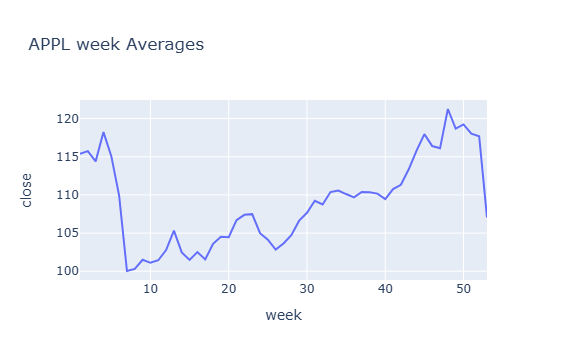

In [72]:
appl_week = apple.groupby(['week'])['close'].mean().reset_index()
px.line(appl_week, 'week','close',title='APPL week Averages')

<Axes: xlabel='date'>

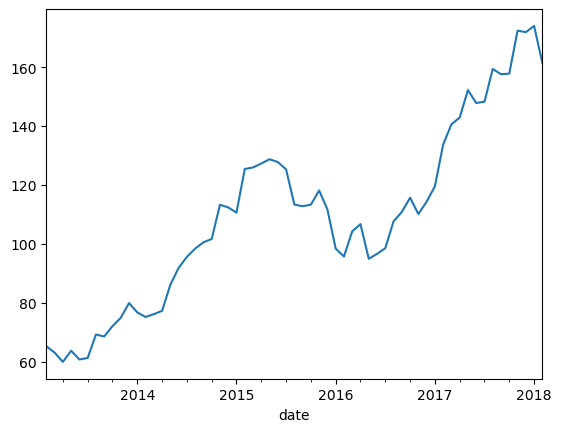

In [77]:
#Another approach to above but on whole time
appl = apple.copy()
appl.set_index('date', inplace=True)
appl.close.resample('M').mean().plot()

<Axes: xlabel='date'>

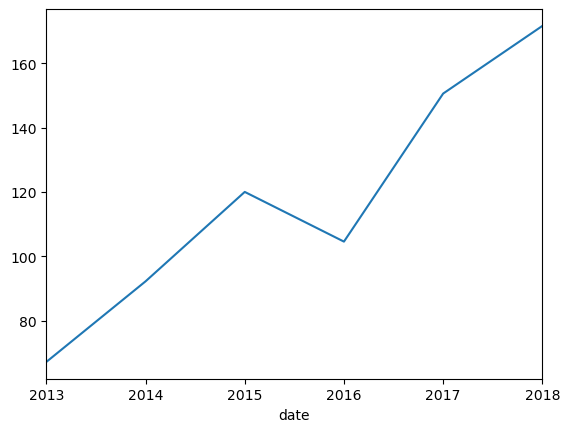

In [74]:
appl.close.resample('Y').mean().plot()

<Axes: xlabel='date'>

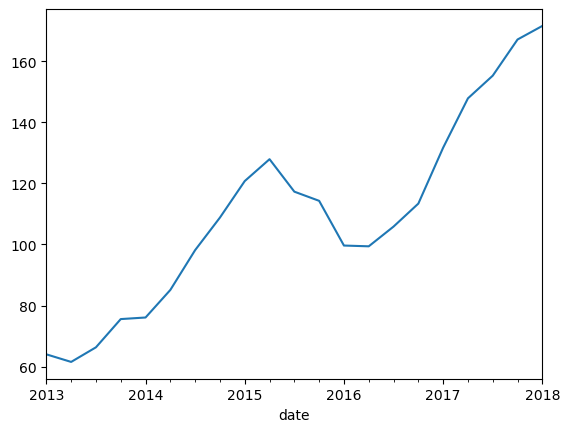

In [75]:
appl.close.resample('Q').mean().plot()

<Axes: xlabel='date'>

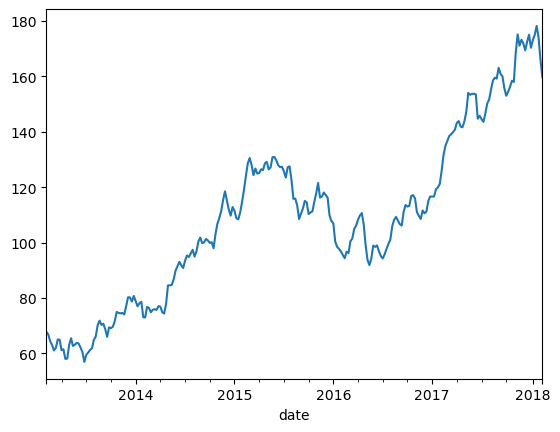

In [76]:
appl.close.resample('W').mean().plot()

In [78]:
new_data.head()

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN


In [85]:
#use pivot table to get close data for each company as a column

close_pivot = all_data.pivot_table(index='date', columns='Name',values = 'close')

In [82]:
close_pivot.corr()

Name,AAPL,AMZN,GOOG,MSFT
Name,,,,
AAPL,1.000000,0.819078,0.755274,0.899689
AMZN,0.819078,1.000000,0.978721,0.955977
GOOG,0.755274,0.978721,1.000000,0.967981
MSFT,0.899689,0.955977,0.967981,1.000000


<Axes: xlabel='Name', ylabel='Name'>

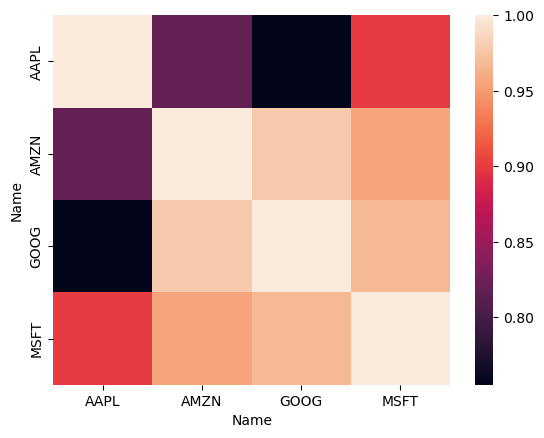

In [83]:
sns.heatmap(close_pivot.corr())

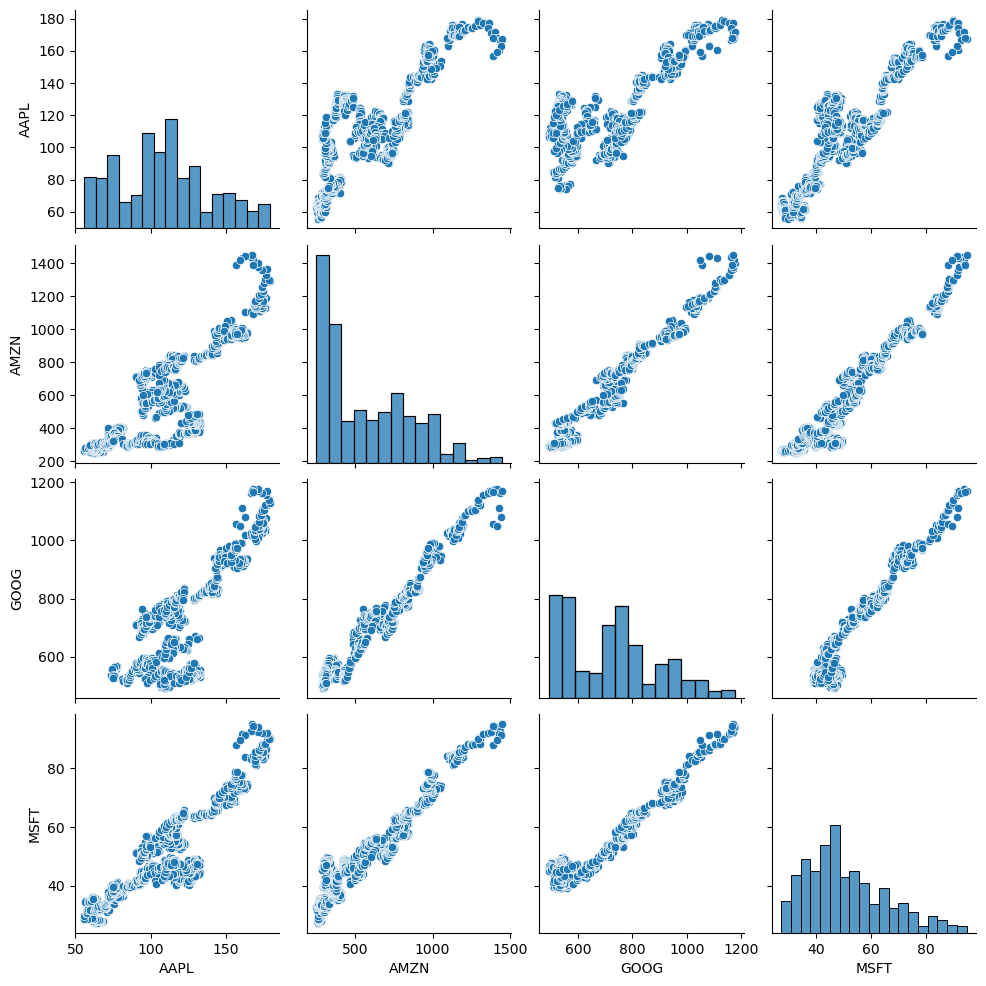

In [84]:
sns.pairplot(close_pivot)

In [91]:
all_data.head()

,date,open,high,low,close,volume,Name,Daily % Change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [92]:
unique_stocks

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [100]:
close_pivot

Name,AAPL,AMZN,GOOG,MSFT
date,,,,
2013-02-08,67.8542,261.95,NaN,27.55
2013-02-11,68.5614,257.21,NaN,27.86
2013-02-12,66.8428,258.70,NaN,27.88
2013-02-13,66.7156,269.47,NaN,28.03
2013-02-14,66.6556,269.24,NaN,28.04
...,...,...,...,...
2018-02-01,167.7800,1390.00,1167.70,94.26
2018-02-02,160.5000,1429.95,1111.90,91.78
2018-02-05,156.4900,1390.00,1055.80,88.00


In [106]:
(close_pivot['AAPL']-close_pivot['AAPL'].shift(1))/close_pivot['AAPL'].shift(1)*100

date
2013-02-08         NaN
2013-02-11    1.042235
2013-02-12   -2.506658
2013-02-13   -0.190297
2013-02-14   -0.089934
                ...   
2018-02-01    0.209043
2018-02-02   -4.339015
2018-02-05   -2.498442
2018-02-06    4.179181
2018-02-07   -2.140710
Name: AAPL, Length: 1259, dtype: float64

In [107]:
close_pivot['AAPL'].pct_change()*100

date
2013-02-08         NaN
2013-02-11    1.042235
2013-02-12   -2.506658
2013-02-13   -0.190297
2013-02-14   -0.089934
                ...   
2018-02-01    0.209043
2018-02-02   -4.339015
2018-02-05   -2.498442
2018-02-06    4.179181
2018-02-07   -2.140710
Name: AAPL, Length: 1259, dtype: float64

In [110]:
for col in close_pivot.columns:
    close_pivot[col+'_pct_change']=close_pivot[col].pct_change()*100

In [111]:
close_pivot

Name,AAPL,AMZN,GOOG,MSFT,AAPL_pct_change,AMZN_pct_change,GOOG_pct_change,MSFT_pct_change
date,,,,,,,,
2013-02-08,67.8542,261.95,NaN,27.55,NaN,NaN,NaN,NaN
2013-02-11,68.5614,257.21,NaN,27.86,1.042235,-1.809506,NaN,1.125227
2013-02-12,66.8428,258.70,NaN,27.88,-2.506658,0.579293,NaN,0.071788
2013-02-13,66.7156,269.47,NaN,28.03,-0.190297,4.163123,NaN,0.538020
2013-02-14,66.6556,269.24,NaN,28.04,-0.089934,-0.085353,NaN,0.035676
...,...,...,...,...,...,...,...,...
2018-02-01,167.7800,1390.00,1167.70,94.26,0.209043,-4.196734,-0.191463,-0.789391
2018-02-02,160.5000,1429.95,1111.90,91.78,-4.339015,2.874101,-4.778625,-2.631021
2018-02-05,156.4900,1390.00,1055.80,88.00,-2.498442,-2.793804,-5.045418,-4.118544


In [114]:
close_p = close_pivot[['AAPL_pct_change',	'AMZN_pct_change',	'GOOG_pct_change',	'MSFT_pct_change']]

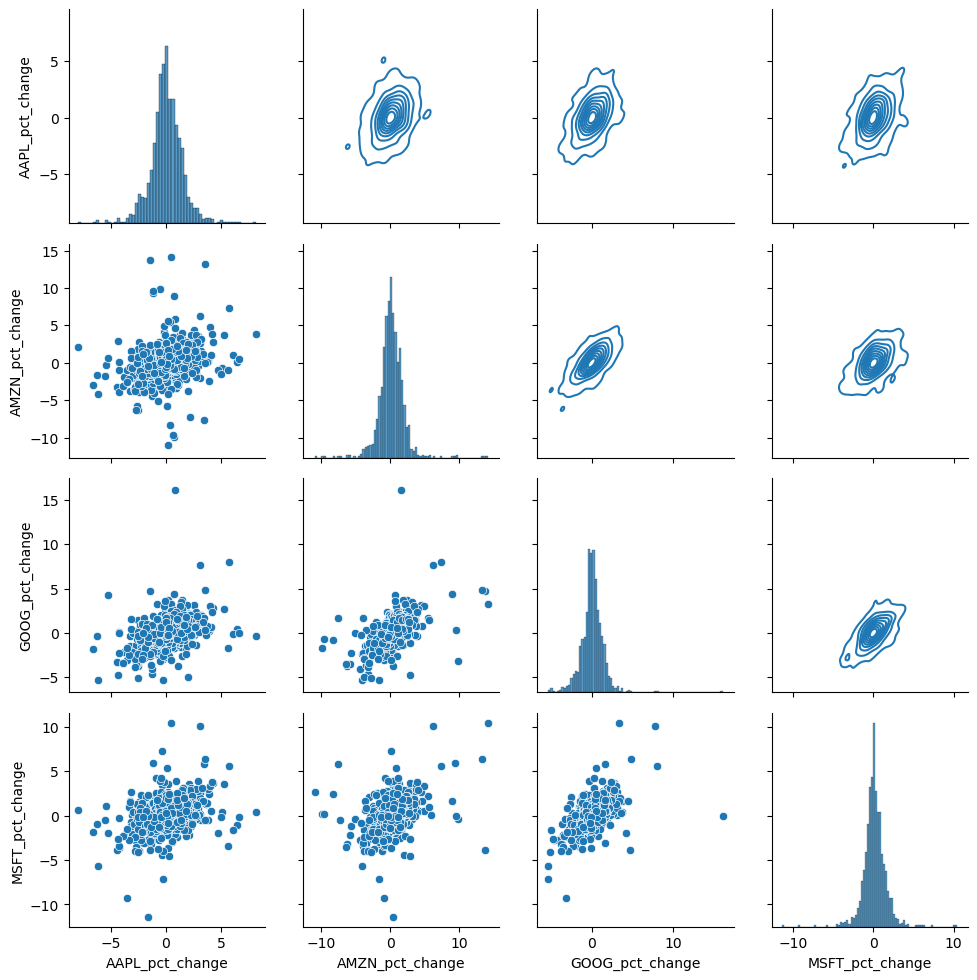

In [115]:
g = sns.PairGrid(data=close_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [116]:
close_p.corr()

Name,AAPL_pct_change,AMZN_pct_change,GOOG_pct_change,MSFT_pct_change
Name,,,,
AAPL_pct_change,1.000000,0.287659,0.415487,0.366598
AMZN_pct_change,0.287659,1.000000,0.586230,0.402678
GOOG_pct_change,0.415487,0.586230,1.000000,0.579281
MSFT_pct_change,0.366598,0.402678,0.579281,1.000000
